In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글폰트 사용을 위한 설정(Window)
import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
matplotlib.rc('font', family=font_name)

1. 데이터 수집 및 로드

In [2]:
df = pd.read_csv('data/incomeDrug.csv')
df.head()

,Year,1인당실질소득,물가,마약류,향정류,대마,총마약사건수,마약규제지수,마약관련행정시스템변화,마약관련법개정,실업률
0,2010,3144,86.4,1124,6771,1837,9732,1,0,0,3.7
1,2011,3173,89.9,759,7226,1189,9174,1,0,0,3.4
2,2012,3252,91.8,582,7631,1042,9255,2,1,1,3.2
3,2013,3364,93.0,685,7902,1177,9764,1,0,0,3.1
4,2014,3459,94.2,676,8121,1187,9984,2,1,1,3.5


2. 데이터구조 및 변수 이해

In [3]:
print(df.info())
print(df.shape)
# 마약규제지수
# 0~2: 규제 완화 또는 규제 거의 없음
# 3~5: 중간 수준 규제 (단속 강화, 처벌 기준 강화 등)
# 6~8: 강도 높은 규제 (수사 권한 확대, 처벌 대폭 강화 등)
# 9~10: 최강 규제 수준 (범정부 종합대책, 특별법, 전면 단속 등)


# 마약관련행정시스템변화 
# 마약류 관리 시스템, 등록 시스템, 수출입 관리 체계 같은 행정적/기술적 시스템 개편이 있었는지 표시하는 지표
# 0: 시스템 변화 없음
# 1: Minor 업데이트 (신고 절차 변경, 내부 운영규정 개정 등)
# 2: Major 업데이트 (마약류통합관리시스템(NIMS) 대대적 개편 등)

# 마약관련법개정      
# 해당 연도에 마약류 관련 법이 개정됐는지, 그 강도를 표시하는 값.
# 0: 법 개정 없음
# 1: 경미한 개정
# 2: 중요한 개정
# 3: 전면 개정 또는 강력한 처벌 강화

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         15 non-null     int64  
 1   1인당실질소득      15 non-null     int64  
 2   물가           15 non-null     float64
 3   마약류          15 non-null     int64  
 4   향정류          15 non-null     int64  
 5   대마           15 non-null     int64  
 6   총마약사건수       15 non-null     int64  
 7   마약규제지수       15 non-null     int64  
 8   마약관련행정시스템변화  15 non-null     int64  
 9   마약관련법개정      15 non-null     int64  
 10  실업률          15 non-null     float64
dtypes: float64(2), int64(9)
memory usage: 1.4 KB
None
(15, 11)


3. 데이터요약 및 기술통계

In [19]:
display(df.describe())

,Year,1인당실질소득,물가,마약류,향정류,대마,총마약사건수,마약규제지수,마약관련행정시스템변화,마약관련법개정,실업률
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2017.000000,3782.400000,98.546667,1568.400000,10895.266667,2206.333333,14670.000000,2.000000,0.200000,0.200000,3.440000
std,4.472136,410.936526,7.825678,886.134366,3666.752484,1134.882729,5404.198117,0.845154,0.414039,0.414039,0.404969
min,2010.000000,3144.000000,86.400000,582.000000,6771.000000,1042.000000,9174.000000,1.000000,0.000000,0.000000,2.700000
25%,2013.500000,3411.500000,93.600000,941.500000,8011.500000,1188.000000,9874.000000,1.000000,0.000000,0.000000,3.150000
50%,2017.000000,3932.000000,97.600000,1467.000000,10631.000000,1727.000000,14123.000000,2.000000,0.000000,0.000000,3.600000
75%,2020.500000,4075.500000,101.250000,1879.000000,11823.000000,3264.500000,17101.500000,3.000000,0.000000,0.000000,3.700000
max,2024.000000,4391.000000,114.200000,3970.000000,19556.000000,4085.000000,27611.000000,3.000000,1.000000,1.000000,4.000000


4. 중복값, 결측치, 이상치 탐지 및 전처리

In [20]:
# 중복값 : 연도별로 나오는 개별 데이터로 겹치는 값 존재하지 않음
# 결측치 없음
df.isna().sum() 

Year           0
1인당실질소득        0
물가             0
마약류            0
향정류            0
대마             0
총마약사건수         0
마약규제지수         0
마약관련행정시스템변화    0
마약관련법개정        0
실업률            0
dtype: int64

In [4]:
from sklearn.preprocessing import StandardScaler

# 숫자형 컬럼
num_cols = [
    '1인당실질소득','물가','마약류','향정류','대마','총마약사건수',
    '실업률'
]

# 스케일링
scaler = StandardScaler()
scaled = scaler.fit_transform(df[num_cols])

df_scaled = pd.DataFrame(scaled, columns=num_cols)


df_scaled.head()


,1인당실질소득,물가,마약류,향정류,대마,총마약사건수,실업률
0,-1.608051,-1.606633,-0.519106,-1.164251,-0.336860,-0.945805,0.664558
1,-1.535003,-1.143690,-0.945465,-1.035808,-0.927884,-1.052682,-0.102240
2,-1.336012,-0.892378,-1.152219,-0.921479,-1.061960,-1.037167,-0.613438
3,-1.053898,-0.733655,-1.031904,-0.844978,-0.938829,-0.939675,-0.869038
4,-0.814605,-0.574931,-1.042417,-0.783156,-0.929709,-0.897538,0.153360


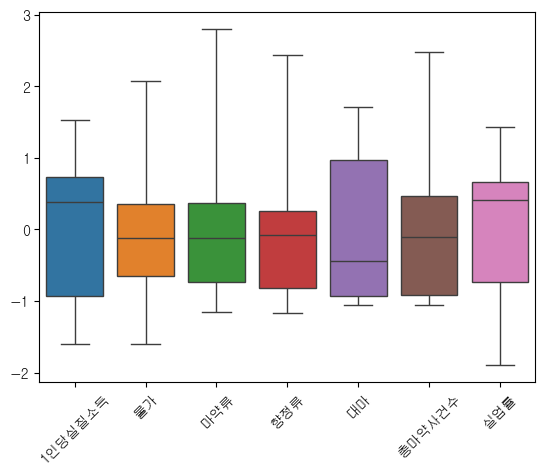

In [5]:
# 이상치탐지 : 특이값 x
# 연도별 마약류사건 증가에 따라 이상치 기준을 2.5로 완화함
sns.boxplot(
    data=df_scaled[['1인당실질소득','물가','마약류','향정류','대마',
             '총마약사건수','실업률']],
    whis=2.5
)

plt.xticks(rotation=45)
plt.show()



5. 변수 분포 시각화

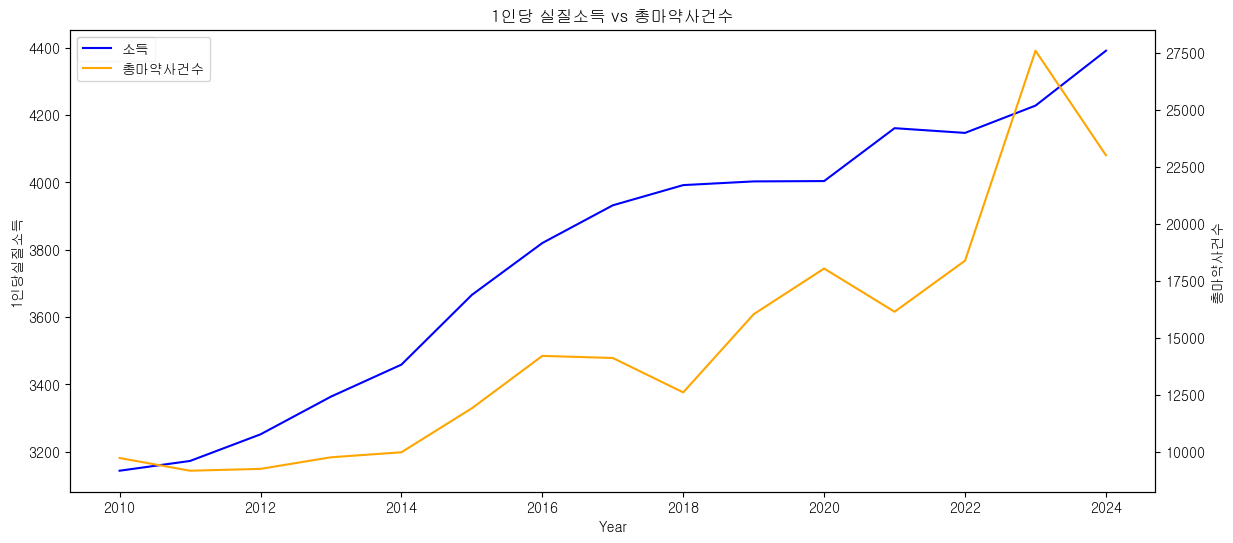

In [42]:
# 1) 1인당 실질소득 vs 총마약사건수 (라인플롯)
plt.figure(figsize=(14,6))

# 왼쪽 축: 소득
ax1 = sns.lineplot(data=df, x="Year", y="1인당실질소득", color="blue", label="소득")
ax1.set_ylabel("1인당실질소득")

# 오른쪽 축 생성
ax2 = ax1.twinx()
sns.lineplot(data=df, x="Year", y="총마약사건수", color="orange", label="총마약사건수", ax=ax2)
ax2.set_ylabel("총마약사건수")

# 👉 두 축의 라인 + 라벨을 모두 가져오기
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.title("1인당 실질소득 vs 총마약사건수")
plt.show()



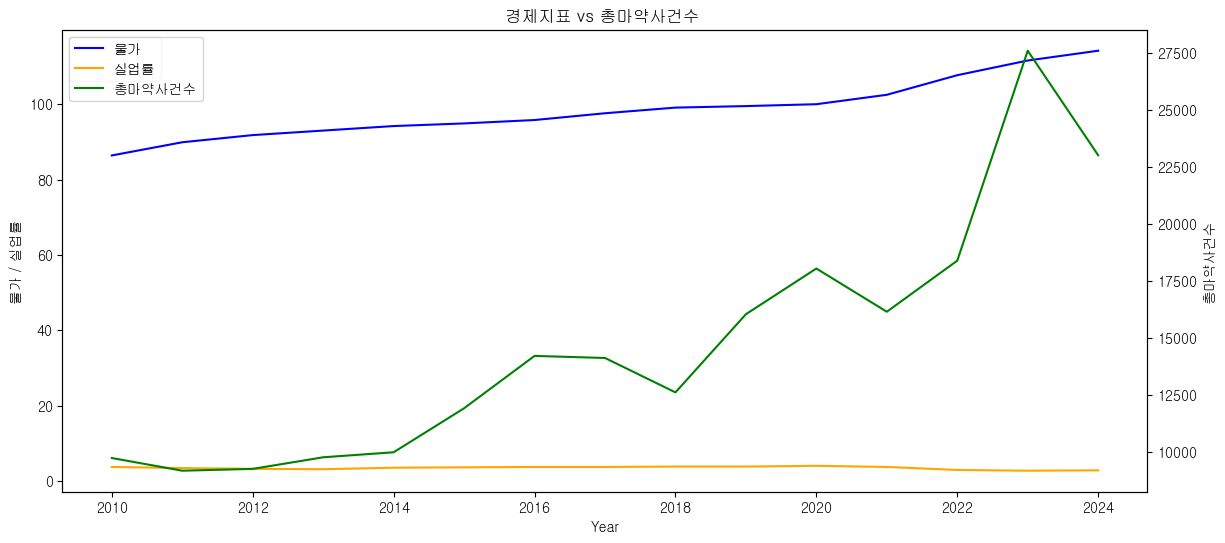

In [43]:
# 물가 / 실업률 / 총마약사건수 3개 비교

plt.figure(figsize=(14,6))

# 왼쪽 y축
ax1 = sns.lineplot(data=df, x="Year", y="물가", label="물가", color="blue")
ax1_2 = sns.lineplot(data=df, x="Year", y="실업률", label="실업률", color="orange")
ax1.set_ylabel("물가 / 실업률")

# 오른쪽 y축
ax2 = ax1.twinx()
ax2_line = sns.lineplot(data=df, x="Year", y="총마약사건수", label="총마약사건수", color="green", ax=ax2)
ax2.set_ylabel("총마약사건수")

plt.title("경제지표 vs 총마약사건수 ")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.show()




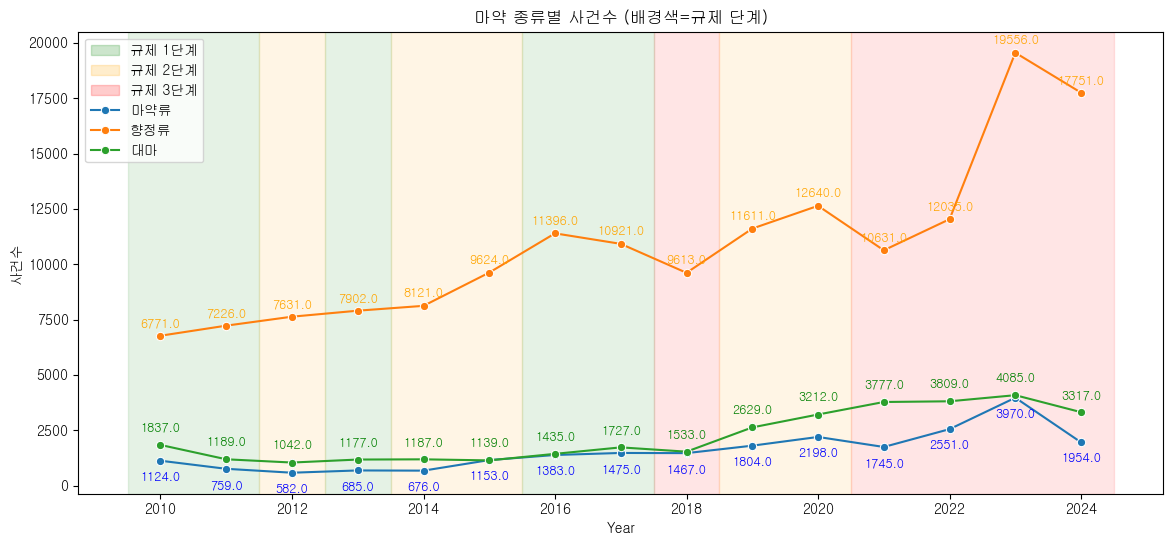

In [ ]:
# 3) 마약류·향정·대마 세부 유형 vs 규제지수

import matplotlib.patches as mpatches

plt.figure(figsize=(14,6))
ax = sns.lineplot(data=df, x='Year', y='마약류', label='마약류', marker = 'o')
sns.lineplot(data=df, x='Year', y='향정류', label='향정류', marker = 'o')
sns.lineplot(data=df, x='Year', y='대마', label='대마', marker = 'o')

ax.set_ylabel("사건수")

# 규제지수 색상 매핑
color_map = {1:'green', 2:'orange', 3:'red'}

# 규제지수 구간별로 배경 색칠
current_level = None
start_year = None

for i, row in df.iterrows():
    year = row['Year']
    level = row['마약규제지수']
    
    if current_level is None:
        current_level = level
        start_year = year
    elif level != current_level:
        ax.axvspan(start_year-0.5, year-0.5, 
                   alpha=0.1,
                   color=color_map[current_level])
        current_level = level
        start_year = year

# 마지막 구간
ax.axvspan(start_year-0.5, df['Year'].iloc[-1] + 0.5,
           alpha=0.1, color=color_map[current_level])

for i, row in df.iterrows():
    year = row['Year']
    offset = 1000

    # 마약류 값 표시
    ax.text(year, row['마약류']-offset, f"{row['마약류']}", 
            color='blue', # 마약류 선 색상과 일치하도록 조정 (기본 seaborn 색상)
            ha='center', va='bottom', fontsize=9)
    
    # 향정류 값 표시
    ax.text(year, row['향정류']+300, f"{row['향정류']}", 
            color='orange', # 향정류 선 색상과 일치하도록 조정
            ha='center', va='bottom', fontsize=9)
            
    # 대마 값 표시
    ax.text(year, row['대마']+offset, f"{row['대마']}", 
            color='green', # 대마 선 색상과 일치하도록 조정
            ha='center', va='top', fontsize=9)
    
plt.title("마약 종류별 사건수 (배경색=규제 단계)")

# 🔥 규제지수 범례 추가 (Proxy Artist)
legend_patches = [
    mpatches.Patch(color='green', alpha=0.2, label='규제 1단계'),
    mpatches.Patch(color='orange', alpha=0.2, label='규제 2단계'),
    mpatches.Patch(color='red', alpha=0.2, label='규제 3단계')
]

plt.legend(handles=legend_patches + ax.get_legend_handles_labels()[0], loc='upper left')

plt.show()


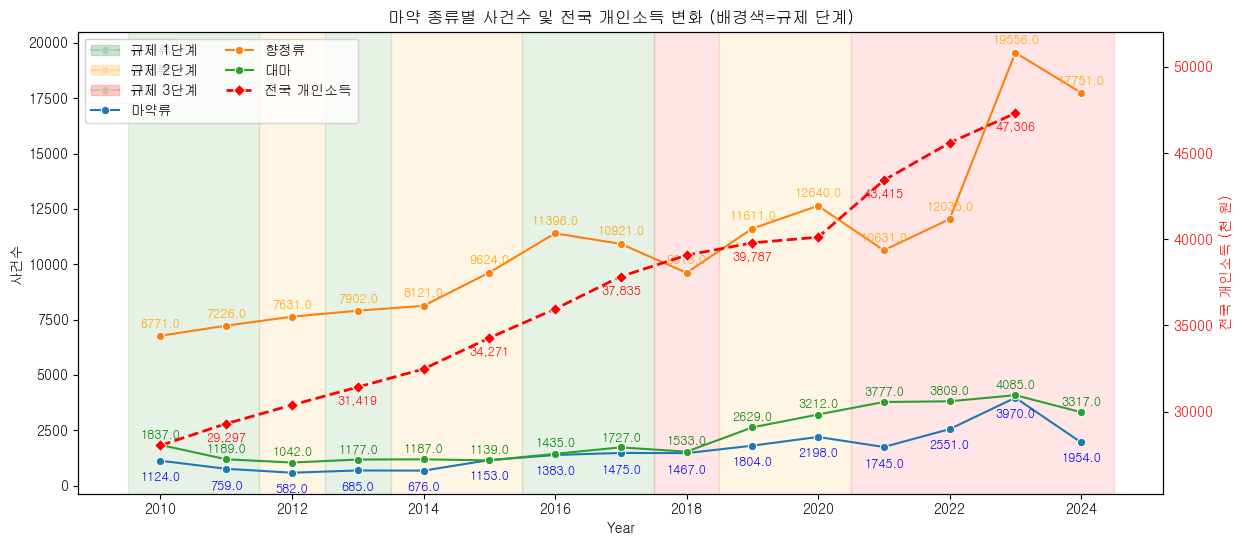

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from io import StringIO

# ==============================================================================
# 1. 'personal_income.csv' 파일 읽기 및 전국 소득 데이터 전처리
# ==============================================================================

# 파일 로드 (여기서는 임시로 데이터프레임 df_income을 구성합니다)
# 실제 파일 경로와 일치하는 코드를 사용합니다.
df_income = pd.read_csv("../data/personal_income.csv")

# '전국' 데이터만 추출
df_income_national = df_income[df_income['시도별'] == '전국'].iloc[0, 1:]
df_income_national = df_income_national.T.reset_index()
df_income_national.columns = ['Year', 'National_Income']

# 'Year' 컬럼 정리: '2023 p)'와 같은 불필요한 문자 제거 및 정수형 변환
df_income_national['Year'] = df_income_national['Year'].str.replace(r' p\)', '', regex=True).astype(int)

# 'National_Income' 컬럼 정리: 쉼표 제거 및 숫자형(float)으로 변환
# 데이터에 '-' 값이 있는 경우 NaN으로 처리하고, 결측값은 0으로 임시 처리 후 int로 변환
df_income_national['National_Income'] = pd.to_numeric(df_income_national['National_Income'], errors='coerce')

# 2010년부터 2023년 데이터만 필터링 (기존 df의 Year 범위와 맞추기 위해)
df_income_national = df_income_national[(df_income_national['Year'] >= 2010) & 
                                       (df_income_national['Year'] <= 2023)]


# ==============================================================================
# 2. 기존 df와 소득 df 병합 (Year 기준으로)
# (이 과정은 필수적이지 않지만, 하나의 데이터프레임으로 관리하는 것이 편리할 수 있습니다.)
# ==============================================================================
# 기존 df의 'Year' 컬럼이 정수형이라고 가정합니다.
# df = pd.merge(df, df_income_national, on='Year', how='left')


# ==============================================================================
# 3. 그래프 코드에 보조 축 추가 (ax.twinx())
# ==============================================================================

# ⭐ 중요: 이 코드를 실행하기 위해서는 기존에 정의된 df (마약류 사건수 데이터)가 
#          프로그램 내에 존재해야 합니다. 여기서는 실행 편의를 위해 임의의 df를 
#          재구성하는 대신, 사용자 코드에 합치는 방식으로 안내하겠습니다.


plt.figure(figsize=(14,6))
ax = sns.lineplot(data=df, x='Year', y='마약류', label='마약류', marker = 'o')
sns.lineplot(data=df, x='Year', y='향정류', label='향정류', marker = 'o')
sns.lineplot(data=df, x='Year', y='대마', label='대마', marker = 'o')

ax.set_ylabel("사건수")

# ----------------------------------------------------------------------
# 🔥 추가된 부분: 보조 Y축 (전국 소득) 🔥
# ----------------------------------------------------------------------
ax2 = ax.twinx()
sns.lineplot(data=df_income_national, x='Year', y='National_Income', 
             ax=ax2, color='r', linestyle='--', linewidth=2, 
             label='전국 개인소득', marker='D', markersize=6)

ax2.set_ylabel("전국 개인소득 (천 원)", color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Y축 최소값을 0 근처로 설정하여 변화폭이 왜곡되지 않도록 조정 (선택 사항)
ax2.set_ylim(df_income_national['National_Income'].min() * 0.9, 
             df_income_national['National_Income'].max() * 1.1)

# 전국 소득 데이터 포인트에 값 표시 (선택 사항)
for i, row in df_income_national.iterrows():
    if i % 2 != 0 :
        ax2.text(row['Year'], row['National_Income'] - 500, 
                f"{int(row['National_Income']):,}", # 천 단위 구분 기호 추가
                color='r', ha='center', va='top', fontsize=9)
# ----------------------------------------------------------------------
# 🔥 추가된 부분 끝 🔥
# ----------------------------------------------------------------------


# 규제지수 색상 매핑
color_map = {1:'green', 2:'orange', 3:'red'}

# 규제지수 구간별로 배경 색칠 (기존 코드 유지)
current_level = None
start_year = None
# ... (배경 색칠 로직은 생략. 기존 코드와 동일합니다)
for i, row in df.iterrows():
    year = row['Year']
    level = row['마약규제지수']
    
    if current_level is None:
        current_level = level
        start_year = year
    elif level != current_level:
        ax.axvspan(start_year-0.5, year-0.5, 
                   alpha=0.1, color=color_map[current_level])
        current_level = level
        start_year = year

# 마지막 구간
ax.axvspan(start_year-0.5, df['Year'].iloc[-1] + 0.5,
           alpha=0.1, color=color_map[current_level])

# 기존 마약류 텍스트 표시 (기존 코드 유지)
for i, row in df.iterrows():
    year = row['Year']
    offset = 1000

    # 마약류 값 표시
    ax.text(year, row['마약류']-offset, f"{row['마약류']}", 
             color='blue', ha='center', va='bottom', fontsize=9)
    
    # 향정류 값 표시
    ax.text(year, row['향정류']+300, f"{row['향정류']}", 
             color='orange', ha='center', va='bottom', fontsize=9)
            
    # 대마 값 표시
    ax.text(year, row['대마']+700, f"{row['대마']}", 
             color='green', ha='center', va='top', fontsize=9)
    
plt.title("마약 종류별 사건수 및 전국 개인소득 변화 (배경색=규제 단계)")

# 🔥 규제지수 및 모든 선 범례 통합 🔥
legend_patches = [
    mpatches.Patch(color='green', alpha=0.2, label='규제 1단계'),
    mpatches.Patch(color='orange', alpha=0.2, label='규제 2단계'),
    mpatches.Patch(color='red', alpha=0.2, label='규제 3단계')
]

# 1. ax와 ax2의 핸들과 레이블을 가져옵니다.
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

# 2. 패치 객체들의 레이블만 따로 추출합니다.
patch_labels = [p.get_label() for p in legend_patches]

# 3. plt.legend()를 호출하여 핸들과 레이블을 통합합니다.
#    핸들: 규제 패치들 + ax의 선들 + ax2의 선들
#    레이블: 규제 패치 레이블 + ax의 선 레이블 + ax2의 선 레이블
plt.legend(handles=legend_patches + h1 + h2, 
           labels=patch_labels + l1 + l2,  # <--- 이 부분이 수정되었습니다.
           loc='upper left', 
           ncol=2)

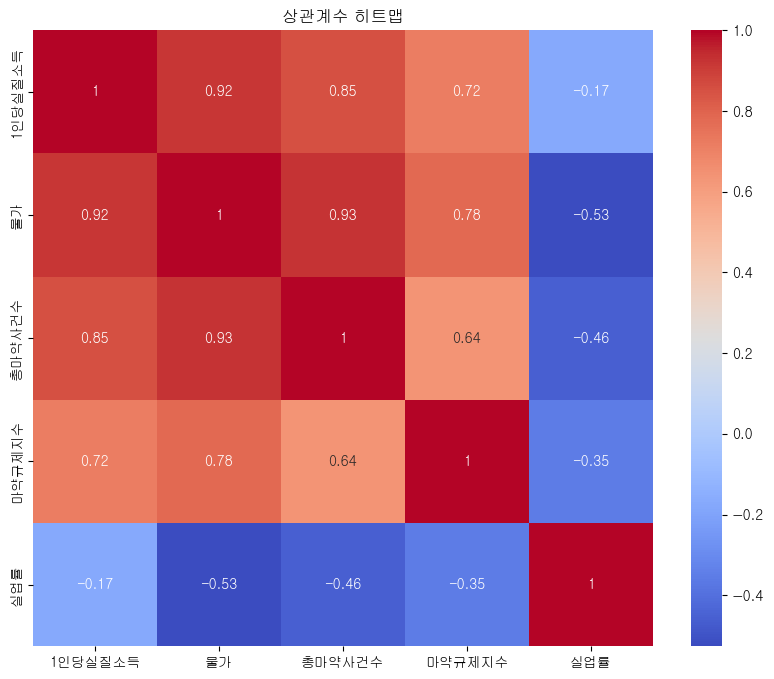

In [ ]:
# 4) 상관관계 분석

num_cols = ['1인당실질소득','물가','총마약사건수','마약규제지수','실업률']

plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("상관계수 히트맵")
plt.show()


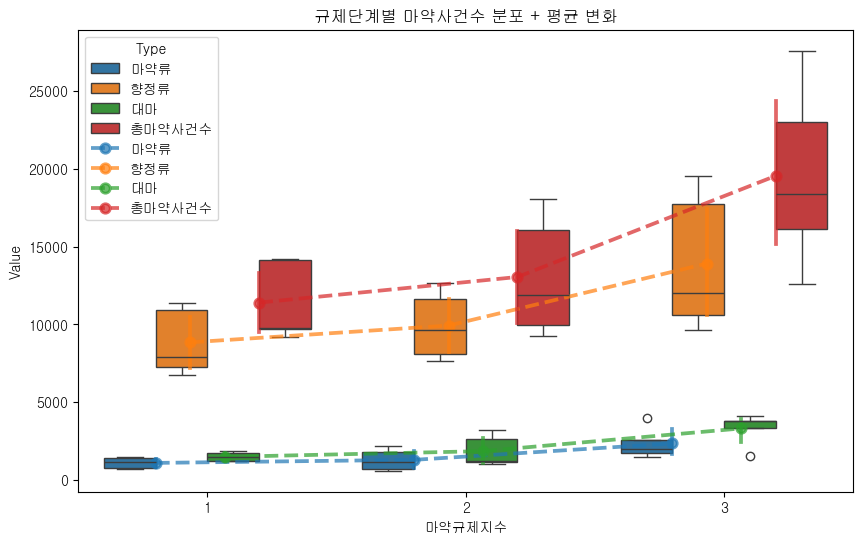

In [37]:
# 정책, 마약범죄 관계

df_long = df.melt(
    id_vars='마약규제지수',
    value_vars=['마약류','향정류','대마','총마약사건수'],
    var_name='Type',
    value_name='Value'
)

plt.figure(figsize=(10,6))
sns.boxplot(data=df_long, x='마약규제지수', y='Value', hue='Type')

# 각 규제수준별 평균선 추가
sns.pointplot(
    data=df_long, 
    x='마약규제지수', 
    y='Value', 
    hue='Type', 
    dodge=0.4, 
    markers='o', 
    linestyles='--',
    alpha=0.7
)

plt.title("규제단계별 마약사건수 분포 + 평균 변화")
plt.show()

